<a href="https://colab.research.google.com/github/SarangGami/Bank-Marketing-Effectiveness-Prediction-supervised-learning/blob/main/Topic_modeling_on_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Topic modeling on News Articles** 

#### **`Project Type`**    - Unsupervised learning (Topic modeling Analysis)
#### **`Contribution`**    - Individual
#### **`Name`**            - Sarang Gami

## **Github Link**

- https://github.com/SarangGami/Topic-modeling-on-News-Articles-Unsupervised-Learning


##**Problem statement**

- In this project, task involves analyzing the content of the articles to extract key concepts and themes that are discussed across the articles to identify major themes/topics across a collection of BBC news articles.

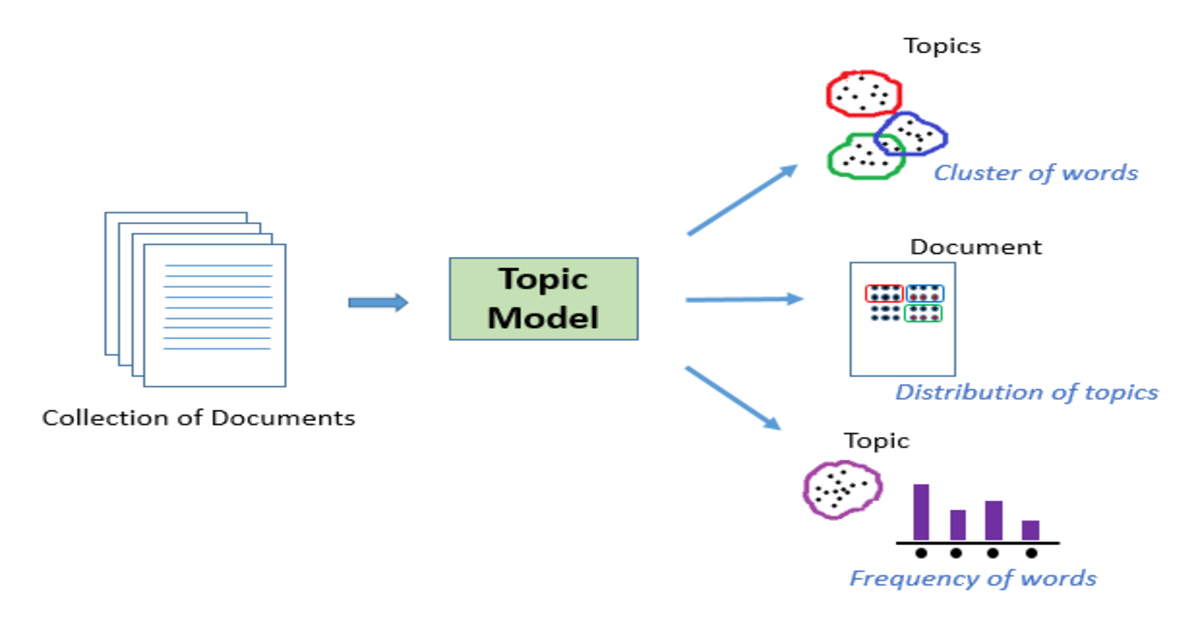

##**Project Summary**

- #### The objective is to create an aggregate dataset of news articles across business, entertainment, politics, sports, and technology and perform topic modeling on this dataset. The purpose is to determine the best segregation of documents based on their topics. This can be useful for topic labeling or for understanding the characteristics of a large text dataset.

- #### Topic modeling can be done using clustering algorithms such as Latent Dirichlet Allocation (LDA) or Latent Semantic Analysis (LSA). The resulting topics can be compared with the different tags available for the news articles to verify their correspondence.

- #### Once the topics have been identified, they can be used for a variety of purposes, such as content analysis, document clustering, and recommendation systems. By analyzing the topics in a corpus of news articles, we can gain insights into the underlying trends and themes in the news. This can be useful for journalists, researchers, and anyone interested in understanding the news media.

##**Project Work flow**

- **Importing Neccessary Libraries**

- **Data Wrangling**

```
      ▪ Gathering Dataset
      ▪ Assessing and cleaning Dataset
```

- **EDA**

```
      ▪ Univariate Analysis
      ▪ Bivariate Analysis 
```

- **Text preparation**

```
      ▪ Text-Cleanup
      ▪ Removing Stopwords
     
```

- **Text pre-processing**

```   
      ▪ Text-Tokenize
      ▪ stemming or lemmatization
      ▪ POS tagging
      
```

- **Text Vectorization**

```
      ▪ BOW
      ▪ TfIdf
     
```

- **Model implementation**

```
      ▪ using different algorithms

```

- **Model Evaluation**

- **Conclusion**

***
##**Importing Basic Neccessary Libraries**

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import re
import string
import os

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import spacy
import gensim
from gensim import corpora

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


***
## **Data Wrangling**

### **`Data Gathering`**

In [ ]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading the text-data from diff-diff topic text files

import os

News=[]
Type=[]

path="/content/drive/MyDrive/Cohort Durban Almabetter (DS)/Topic modelling on BBC news articles/NewsData"
folders=["business","entertainment","politics","sports","tech"]
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)

data={'news':News,'type':Type}
news_df = pd.DataFrame(data)

In [ ]:
# check the first 5 rows from dataset

news_df.head()

news      type
0  b"WorldCom trial starts in New York\n\nThe tri...  business
1  b'Aids and climate top Davos agenda\n\nClimate...  business
2  b"Israel looks to US for bank chief\n\nIsrael ...  business
3  b'Criminal probe on Citigroup deals\n\nTraders...  business
4  b'LSE \'sets date for takeover deal\'\n\nThe L...  business

In [ ]:
# check the randomly 5 rows from dataset

news_df.sample(5)

news           type
1736  b'Greek pair set for hearing\n\nKostas Kenteri...         sports
1827  b'Net fingerprints combat attacks\n\nEighty la...           tech
1069  b'Brown and Blair face new rift claims\n\nFor ...       politics
918   b'Sayeed to stand down as Tory MP\n\nTory MP J...       politics
830   b"Dutch watch Van Gogh's last film\n\nThe last...  entertainment

### **`Accessing and Cleaning dataset`**

In [ ]:
# finding out how many rows and columns in our dataset

news_df.shape

(2225, 2)

In [ ]:
# check information about all columns

news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
# change the Dtype of type column

news_df['type'] = news_df['type'].astype('category')
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   news    2225 non-null   object  
 1   type    2225 non-null   category
dtypes: category(1), object(1)
memory usage: 19.9+ KB


In [ ]:
# describe the dataset

news_df.describe()

news    type
count                                                2225    2225
unique                                               2127       5
top     b'Howard denies split over ID cards\n\nMichael...  sports
freq                                                    2     511

In [ ]:
# check the duplicate values in dataset

news_df.duplicated().sum()

98

In [ ]:
# remove the duplicate value and check the new shape of dataset

news_df = news_df.drop_duplicates()
news_df.shape

(2127, 2)

In [ ]:
# check the null or missing values

news_df.isna().sum()

news    0
type    0
dtype: int64

**Observations :-**
- The dataset consist of 2225 rows and 2 columns. (news, type)
- we assign category Datatype to type column.
- The news articles are of 5 unique types.
- The dataset has no any null and missing values.
- In dataset total 98 duplicate news articles, so we remove all duplicates.
- The new shape of the dataset is 2127 rows with 2 columns after removal of duplicates.

---
## **EDA and Visualization**

In [ ]:
# create new data frame from original dataset for further data analysis.

df = news_df.copy()

In [ ]:
# check the distribution of type column

df['type'].value_counts().reset_index()

index  type
0         sports   505
1       business   503
2       politics   403
3  entertainment   369
4           tech   347

In [ ]:
# check the distribution of different types of Articles in the dataset

fig = px.histogram(df, x='type', color='type')
fig.update_layout(xaxis_title='News Type', yaxis_title='Total Articles')
fig.show()

- The distribution of the type column in the given dataset appears to be balanced, as the value counts of all the categories are roughly equal. Topics Business and Sports have little bit more number of news articles in the dataset.

- Having a balanced distribution of categories is important in machine learning tasks such as topic modeling, as it ensures that the model is trained on a diverse set of examples and is not biased towards any particular category.

In [ ]:
# add new column length of the each article of news column

df['length']=df['news'].apply(len)

In [ ]:
# add new column of word count of each article

df['word_count'] = df['news'].apply(lambda x: len(str(x).split(" ")))
df.head()

news      type  length  \
0  b"WorldCom trial starts in New York\n\nThe tri...  business    1327   
1  b'Aids and climate top Davos agenda\n\nClimate...  business    2715   
2  b"Israel looks to US for bank chief\n\nIsrael ...  business    1500   
3  b'Criminal probe on Citigroup deals\n\nTraders...  business    1750   
4  b'LSE \'sets date for takeover deal\'\n\nThe L...  business    2300   

   word_count  
0         205  
1         442  
2         252  
3         276  
4         364

In [ ]:
# Total number of words present in the whole corpus

Total_words=sum(df['word_count'])
Total_words

807079

- Total words in overall news articles is 8 lakh+.

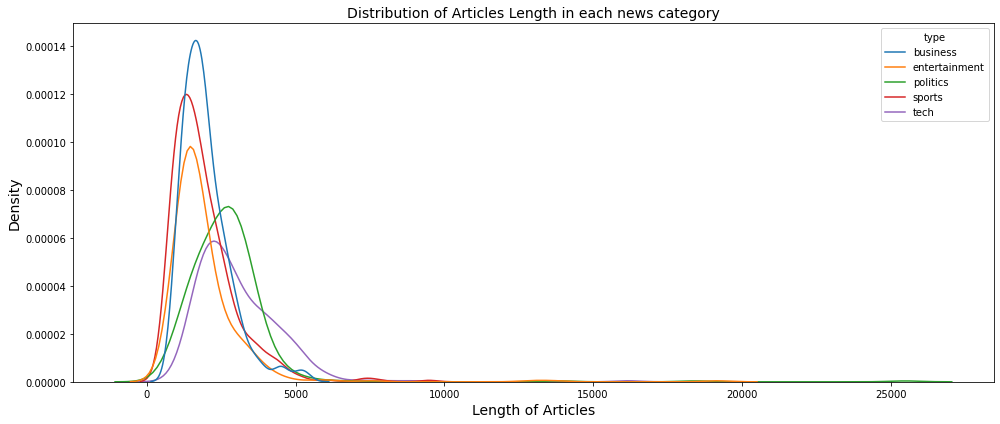

In [ ]:
# Distribution of Articles Length of different news type

plt.figure(figsize=(14,6))
sns.kdeplot(data=df, x=df['length'], hue=df['type'])
plt.title('Distribution of Articles Length in each news category', color='black', fontsize=14)
plt.xlabel('Length of Articles', color='black', fontsize=14)
plt.ylabel('Density', color='black', fontsize=14)
plt.tight_layout()
plt.show()

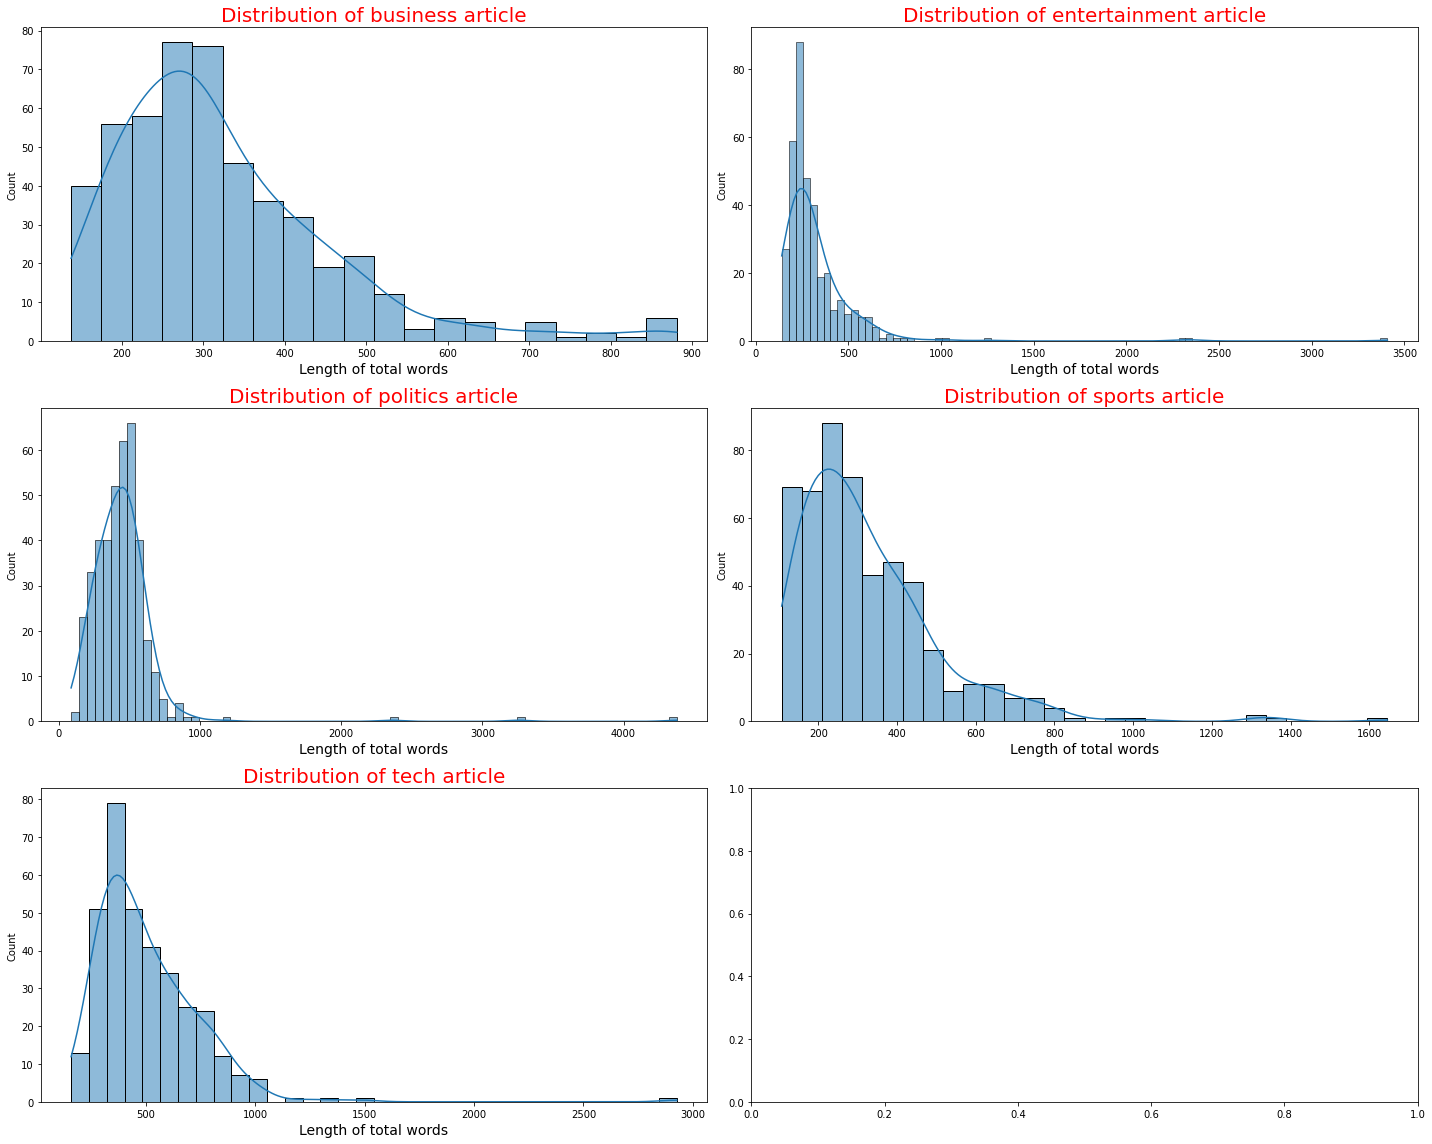

In [ ]:
types_article = df['type'].unique()

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,16))

for i, article in enumerate(types_article):
    ax = axs[i//2, i%2]
    sns.histplot(x=df[df['type']==article]['word_count'], kde=True, ax=ax)
    ax.set_title(f'Distribution of {article} article', size=20, color='red')
    ax.set_xlabel('Length of total words', fontsize=14, color='black')

plt.tight_layout()
plt.show()

- Topics Business and Sports have more number of news articles in the dataset.
- Business has more aritlces of lesser word-counts(less than 900 words)
- Politics, tech and Entertainment articles are bigger than other two topic.
- The curve shows most of the articles are of length 300 to 500 words approx.

In [ ]:
# decode text data
df['news'] = df['news'].apply(lambda x: x.decode('utf-8', 'ignore'))

In [ ]:
# define a function for top N words of all articles

import nltk
nltk.download('stopwords')

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0] for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


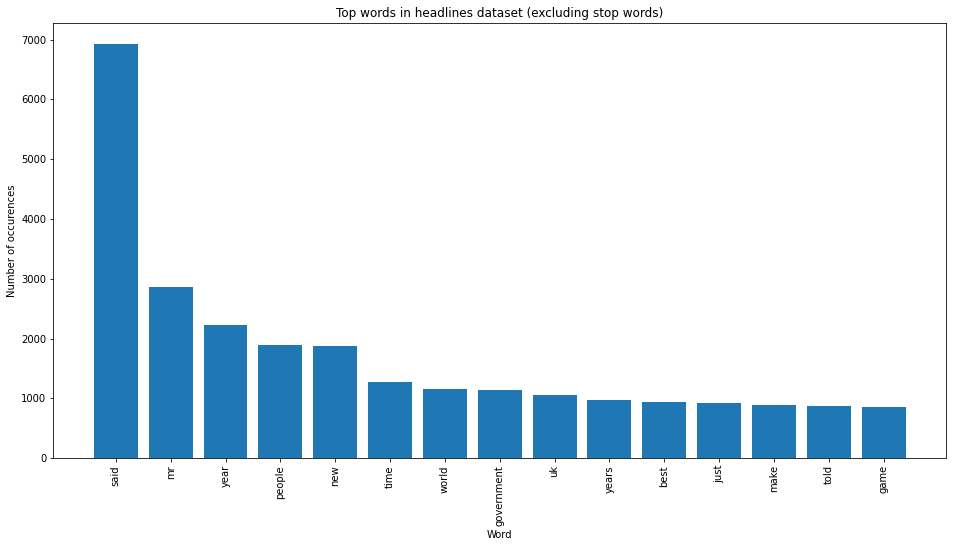

In [ ]:
# plot a bar graph of top 15 words after removing basic nltk English stopwords.

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

- After analyzing the text data, it appears that there are certain stopwords present even after removing the common stopwords for visualization.
-  the presence of double character words can also affect the quality of topic modeling.
- By removing irrelevant or noisy words, we can increase the relevance and coherence of the topics generated by the model. However, it is also important to ensure that we are not removing any important words that may be essential for the identification of certain topics

In [ ]:
from wordcloud import WordCloud

# define function of generate word clouds for each topic to visualize

def generate_wordclouds(df, types):
    for topic_type in types:
        allWords = ' '.join([topic for topic in df[df['type']==topic_type]['news']])
        wordCloud = WordCloud(width=500, height=300, background_color="white", random_state=21, max_font_size=110).generate(allWords)
        plt.figure(figsize=(15,10))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(topic_type + ' Word Cloud')
        plt.show()

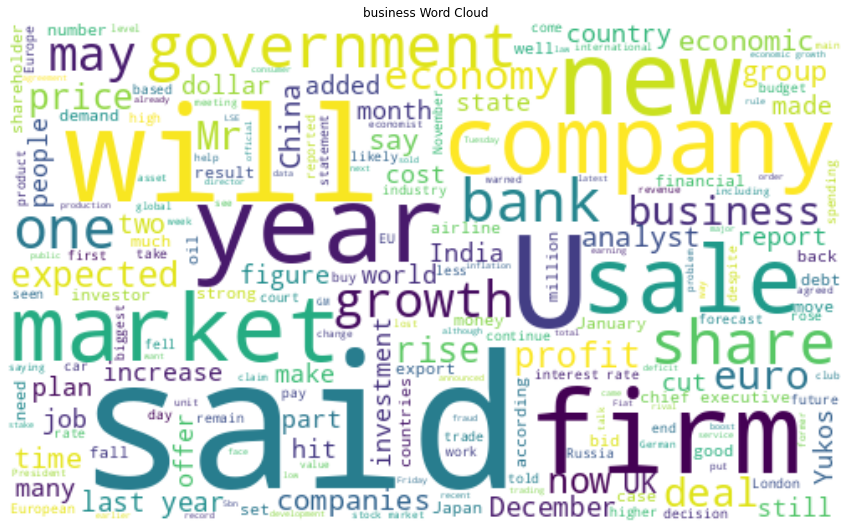

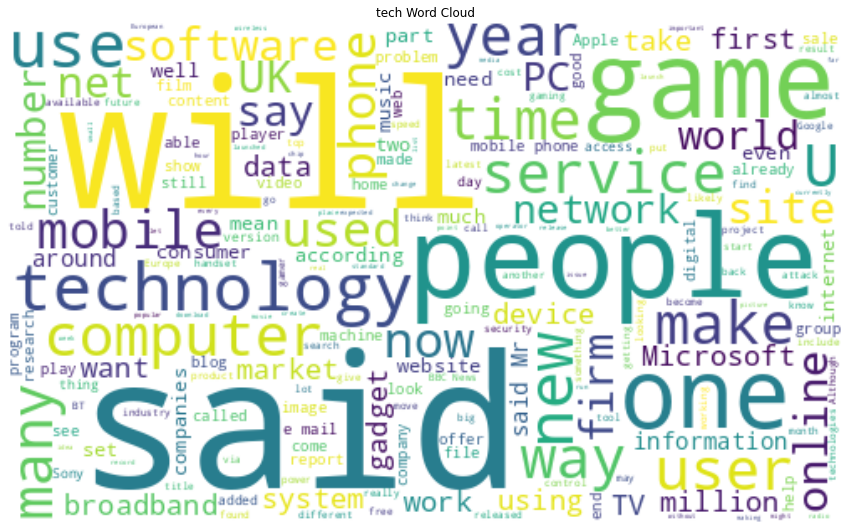

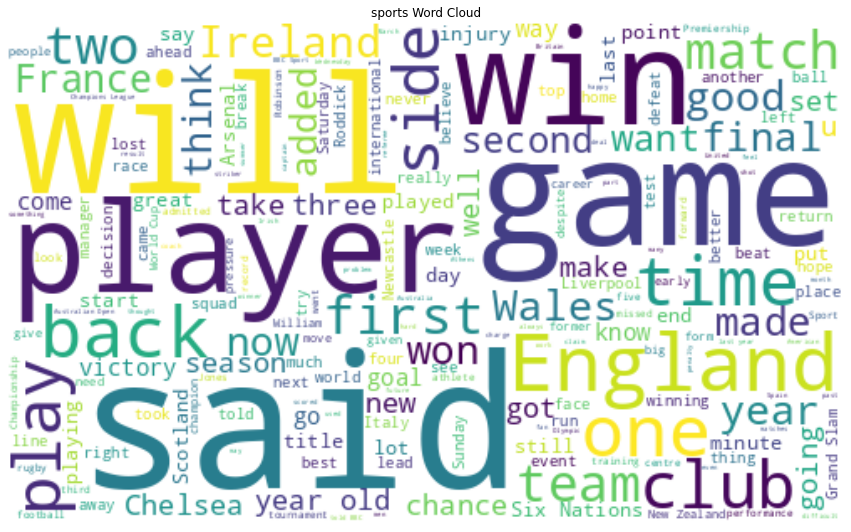

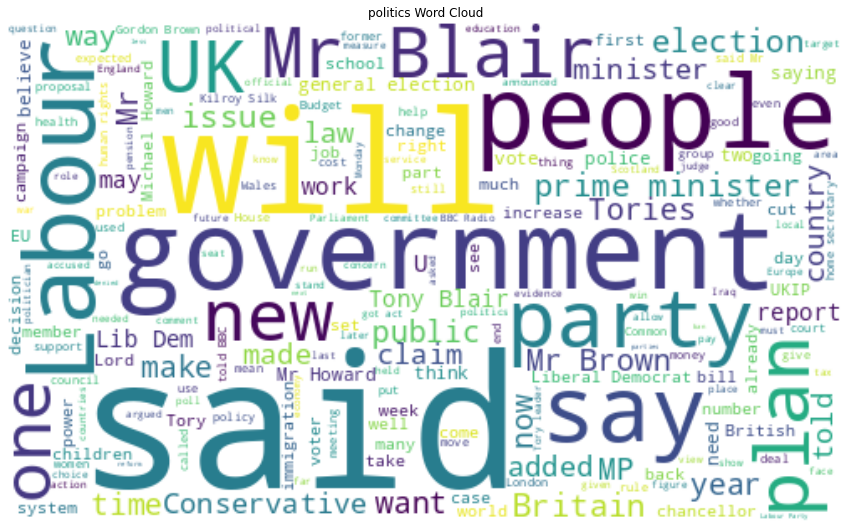

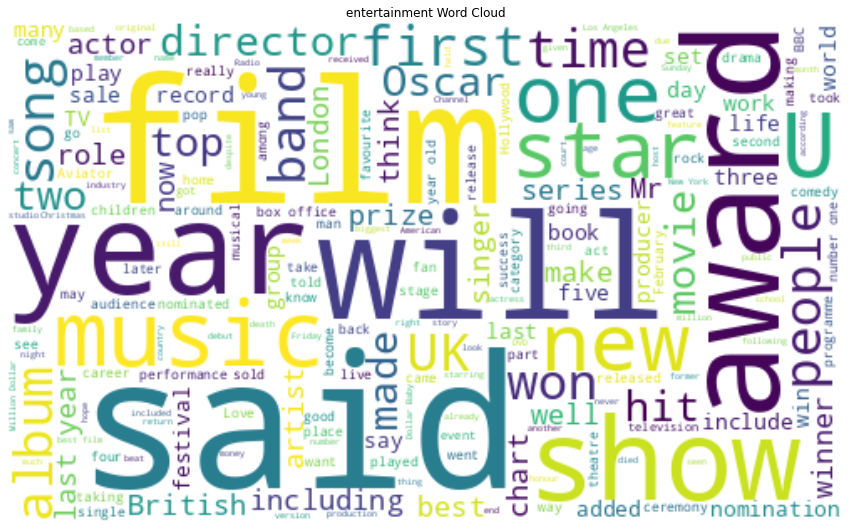

In [ ]:
# apply the function

types = ['business', 'tech', 'sports', 'politics', 'entertainment']
generate_wordclouds(df, types)

***
## **Text pre-processing**


### **`Text cleaning`**

In [ ]:
# decode utf-8

news_df['news'] = news_df['news'].apply(lambda x: x.decode('utf-8', 'ignore'))

In [ ]:
# here's a new function clean_text that applies the 10 text preprocessing steps to clean the texts of news column

import re
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    pattern = re.compile('<.*?>')
    text = pattern.sub(r'', text)

    # Remove URLs
    pattern = re.compile(r'https?://\S+|www\.\S+')
    text = pattern.sub(r'', text)
    
    # Replace newline characters with spaces
    text = text.replace('\n', ' ')
    
    # Replace non-alphabetic characters with spaces
    text = re.sub("[^a-zA-Z]", " ", text)

    # remove text within brackets
    text = re.sub(r'\([^()]*\)', '', text)
    
    # remove 'b' at the beginning of article
    text = re.sub(r'^b', '', text)

    # Remove punctuation
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # remove double characters
    text = re.sub(r'\s([a-zA-Z]{2})\s', ' ', text)
    
    return text

In [ ]:
# here we dont need to correct the words spelling. so we dont use TextBlob function.

# def correct_spelling(text):
#     blob = TextBlob(text)
#     return str(blob.correct())

In [ ]:
news_df['news'] = news_df['news'].apply(clean_text)

news_df['news'][0]

'worldcom trial starts new york the trial bernie ebbers former chief executive bankrupt phone company worldcom has started new york with the selection the jury ebbers accused being the mastermind behind bn accounting fraud that eventually saw the firm collapse july his indictment includes charges securities fraud conspiracy and filing false reports with regulators found guilty ebbers could face substantial jail sentence has firmly declared his innocence under ebbers leadership worldcom emerged from mississippi obscurity become telecoms giant and the darling late investors yet competition intensified and the telecoms boom petered out worldcom found itself under growing financial stress when worldcom finally collapsed shareholders lost about and workers lost their jobs ebbers trial which expected last two months the latest series attempts us prosecutors pursue senior executives for fraud will coincide with the retrial former tyco international chief dennis kozlowski and his top lieutenan

### **`Remove Stopwords`**

In [ ]:
# import necessary libraries for stopwords

nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

!pip install -U spacy
!python3 -m spacy download en_core_web_sm

import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-27 03:49:54.482507: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 03:49:54.482583: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 03:49:54.482598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

In [ ]:
# Get NLTK's English stop words
s = set(stopwords.words('english'))

# Add additional stop words
additional_stop_words = ['said', 'told', 'called', 'use', 'know', 'came', 'based', 'way', 'added', 'including', 'got']
s.update(additional_stop_words)

# Use the updated set of stop words in your code
len(s)

190

In [ ]:
# define function to remove stopwords

def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in s:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
# load the spaCy English language model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# get the list of spaCy English stopwords
stop_words = nlp.Defaults.stop_words
len(stop_words)

326

In [ ]:
# define function of remove_spacy_stopwords

def remove_spacy_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
# apply both stopwords function to remove stopwords

news_df['news'] = news_df['news'].apply(remove_stopwords)
news_df['news'] = news_df['news'].apply(remove_spacy_stopwords)

In [ ]:
# check the news column

news_df['news'][0]

'worldcom trial starts new york trial bernie ebbers  chief executive bankrupt phone company worldcom started new york selection jury ebbers accused mastermind  bn accounting fraud eventually saw firm collapse july indictment includes charges securities fraud conspiracy filing false reports regulators found guilty ebbers  face substantial jail sentence firmly declared innocence ebbers leadership worldcom emerged mississippi obscurity  telecoms giant darling late investors  competition intensified telecoms boom petered worldcom found growing financial stress worldcom finally collapsed shareholders lost workers lost jobs ebbers trial expected   months latest series attempts  prosecutors pursue senior executives fraud coincide retrial  tyco international chief dennis kozlowski  lieutenant accused looting industrial conglomerate tune trail preparations  preparing  executives shamed energy firm enron'

**`Note :-`**

- After performing various text cleanup operations such as converting the text to lowercase, removing HTML tags and URLs, removing non-alphabetic characters and punctuation, removing single characters, and removing extra whitespaces, the text data has been transformed into a very clean format.

-  These operations have helped to eliminate any noise or irrelevant information from the data, making it easier to analyze and process. The cleaned text data is now ready for further analysis.

### **`Text-lemmatization and Tokenize`**

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# creating fuctions for Lemmatization and tokenization

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):  
    output = []
    for sent in texts:
        doc = nlp(sent)
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [ ]:
# make new list of texts and apply lemmatization function.

text_list = news_df['news'].tolist()

tokenized_text = lemmatization(text_list)

In [ ]:
# check the tokenized_text

tokenized_text[0]

['chief',
 'executive',
 'bankrupt',
 'phone',
 'company',
 'selection',
 'jury',
 'ebber',
 'mastermind',
 'accounting',
 'fraud',
 'firm',
 'collapse',
 'indictment',
 'charge',
 'security',
 'fraud',
 'conspiracy',
 'false',
 'report',
 'regulator',
 'guilty',
 'ebber',
 'substantial',
 'jail',
 'sentence',
 'innocence',
 'ebber',
 'obscurity',
 'telecom',
 'giant',
 'darling',
 'late',
 'investor',
 'competition',
 'telecom',
 'boom',
 'financial',
 'stress',
 'shareholder',
 'worker',
 'job',
 'ebber',
 'trial',
 'month',
 'late',
 'series',
 'prosecutor',
 'senior',
 'executive',
 'fraud',
 'retrial',
 'international',
 'chief',
 'lieutenant',
 'industrial',
 'conglomerate',
 'tune',
 'trail',
 'preparation',
 'executive']

---
## **Latent Dirichlet Allocation model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# create CountVectorizer instance with ngram_range=(1,3)1
vectorizer = CountVectorizer(ngram_range=(1,3))

# fit the vectorizer to the corpus
vectorizer.fit(news_df['news'])

# transform the corpus into BoW matrix
bow_matrix = vectorizer.transform(news_df['news'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tf-Idf vectoriser
vectorizer = TfidfVectorizer(min_df = 0.03)
document_term_matrix = vectorizer.fit_transform(news_df['news'])

In [ ]:
bow_matrix.shape

(2127, 690769)

In [ ]:
document_term_matrix.shape

(2127, 980)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42,max_iter=100,n_jobs=-1)
lda.fit(document_term_matrix)


LatentDirichletAllocation(max_iter=100, n_components=5, n_jobs=-1,
                          random_state=42)

In [ ]:
# LDA model
top_lda=lda.fit_transform(document_term_matrix)

print(top_lda.shape)

(2127, 5)


In [ ]:
from wordcloud import WordCloud

vocab = vectorizer.get_feature_names_out()

# Generate a word cloud image for given topic
def word_cloud_lda(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

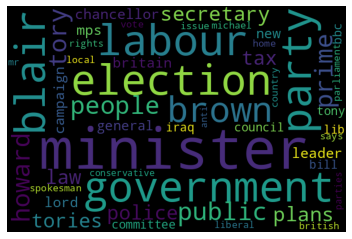

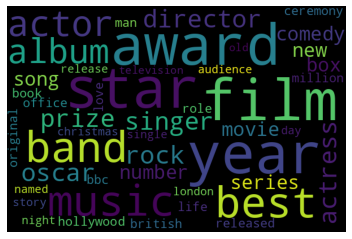

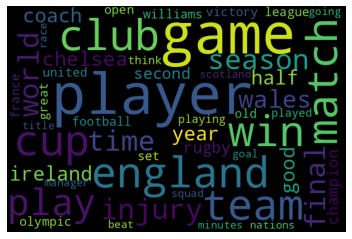

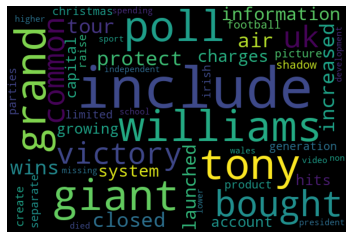

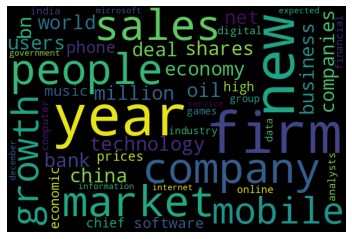

In [ ]:
# print word clouds for each topic using LSA

for i in range(5):
    word_cloud_lda(i)

## **Latent Semantic Analysis model**

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE


# create svd instance
svd_model = TruncatedSVD(n_components=5,random_state=42,algorithm='randomized')

# fit model to data
svd_model.fit(document_term_matrix)

tsvd_mat=svd_model.transform(document_term_matrix)

In [ ]:
# Using tsne for transformation

tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

<Axes: >

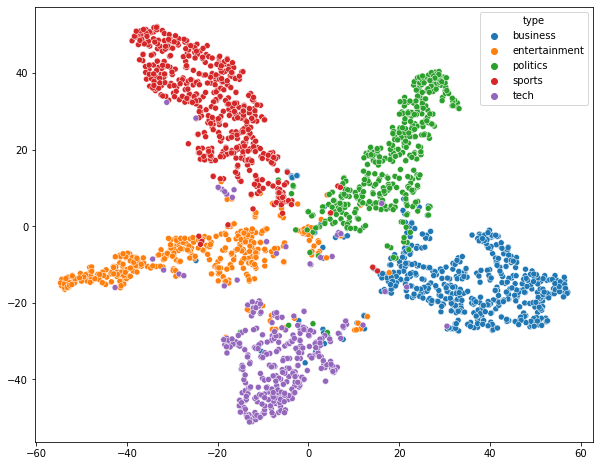

In [ ]:
# Scatter plot of the topics using the t-sne in LSA

plt.figure(figsize=(10,8))
sns.scatterplot(x=tsne_mat[:,0], y=tsne_mat[:,1], hue=news_df['type'])

In [ ]:
# most important words for each topic
vocab = vectorizer.get_feature_names_out()

# Function to generate word cloud for each topic
def word_cloud_lsa(index):
  imp_words_topic=""
  comp=svd_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=800, height=500).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

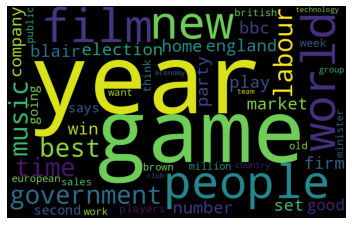

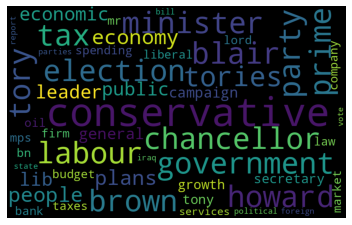

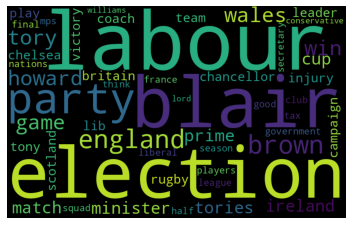

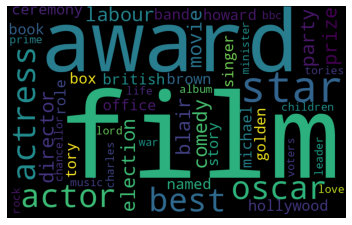

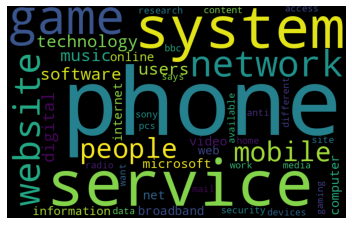

In [ ]:
# print word clouds for each topic using LSA

for i in range(5):
    word_cloud_lsa(i)

### **Gensim's implementation of the Latent Dirichlet Allocation model**

In [ ]:
from gensim import corpora, models

 # Create a dictionary of unique words from tokenized data

def create_dictionary(tokenized_data):
    dictionary = corpora.Dictionary(tokenized_data)
    return dictionary

# Create a bag-of-words matrix from tokenized data and dictionary

def create_bow_matrix(tokenized_data, dictionary):
    bow_matrix = [dictionary.doc2bow(text) for text in tokenized_data]
    return bow_matrix

# Create a TF-IDF matrix from a bag-of-words matrix

def create_tfidf_matrix(bow_matrix):    
    tfidf_model = models.TfidfModel(bow_matrix)
    tfidf_matrix = tfidf_model[bow_matrix]
    return tfidf_matrix

In [ ]:
# Create a dictionary of unique words
dictionary = create_dictionary(tokenized_text)

# Create a bag-of-words matrix
bow_matrix = create_bow_matrix(tokenized_text, dictionary)

# Create a TF-IDF model from the bag-of-words matrix
tfidf_matrix = create_tfidf_matrix(bow_matrix)

In [ ]:
# install visual libraries and coherence model

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# here we are trying to get the optimal model according to the Coherence score(meseaure of Separability)

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=100, update_every=1, alpha='auto', per_word_topics=True,
                                                chunksize=1000, passes=35, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# apply compute_coherence_values function to find best number of topics.

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_matrix, texts=tokenized_text, start=3 ,limit=10 ,step=1)

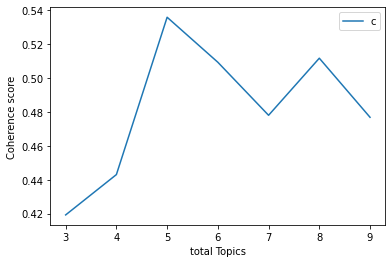

In [ ]:
# plot graph of coherence score for each topics number

limit=10
start=3
step=1

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("total Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# here we knew that the coherence score is maximum for 6 topics so that will become our optimal model
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=bow_matrix, id2word=dictionary, num_topics=5, random_state=100, update_every=1, alpha='auto', per_word_topics=True,
                chunksize=1000, passes=35, iterations=100)

In [ ]:
# print our top 5 topics words

lda_model.print_topics()

[(0,
  '0.019*"year" + 0.018*"good" + 0.017*"game" + 0.013*"film" + 0.010*"time" + 0.009*"player" + 0.009*"award" + 0.006*"team" + 0.006*"world" + 0.006*"music"'),
 (1,
  '0.018*"year" + 0.011*"company" + 0.009*"market" + 0.008*"firm" + 0.007*"sale" + 0.007*"price" + 0.007*"month" + 0.007*"country" + 0.007*"economy" + 0.006*"new"'),
 (2,
  '0.020*"people" + 0.015*"phone" + 0.014*"user" + 0.012*"net" + 0.011*"site" + 0.009*"internet" + 0.009*"service" + 0.009*"system" + 0.008*"software" + 0.008*"computer"'),
 (3,
  '0.012*"government" + 0.012*"people" + 0.011*"election" + 0.008*"labour" + 0.007*"law" + 0.007*"party" + 0.007*"public" + 0.007*"year" + 0.007*"new" + 0.005*"issue"'),
 (4,
  '0.021*"game" + 0.017*"technology" + 0.012*"people" + 0.012*"mobile" + 0.011*"music" + 0.010*"video" + 0.009*"digital" + 0.009*"network" + 0.009*"player" + 0.009*"year"')]

In [ ]:
# plot the distance map visual

pyLDAvis.enable_notebook()
visual = pyLDAvis.gensim.prepare(lda_model, bow_matrix, dictionary)
visual

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.106754  0.110948       1        1  27.579474
0     -0.130541 -0.210292       2        1  26.356281
1     -0.088154  0.120719       3        1  23.765094
2      0.151933  0.058230       4        1  11.212773
4      0.173516 -0.079605       5        1  11.086378, topic_info=            Term         Freq        Total Category  logprob  loglift
1903        game  1579.000000  1579.000000  Default  30.0000  30.0000
112       people  1736.000000  1736.000000  Default  29.0000  29.0000
1637  technology   571.000000   571.000000  Default  28.0000  28.0000
83      election   715.000000   715.000000  Default  27.0000  27.0000
32         phone   550.000000   550.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
132         time   137.490924  1367.799753   Topic5  -5.2185  -0.0979
139        world   112.750872   886.692923   Topic5  -5.4169   0.1371
1174       datum    92.205506   242.216536   Topic5  -5.6180   1.2336
6        company   109.116618   940.151061   Topic5  -5.4496   0.0458
15          firm    98.355052   712.901701   Topic5  -5.5535   0.2187

[363 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3948      5  0.921313  academic
708       1  0.156669    access
708       3  0.042728    access
708       4  0.669406    access
708       5  0.132932    access
...     ...       ...       ...
140       2  0.397575      year
140       3  0.330861      year
140       4  0.055877      year
140       5  0.073487      year
1725      3  0.979412     yukos

[647 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5])

In [ ]:
# find the coherence score

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5359541107373589


In [ ]:
#preparation for wordcloud
topics = lda_model.show_topics(formatted=False)
topic_words = dict(topics)

In [ ]:
topics

[(0,
  [('year', 0.019443342),
   ('good', 0.018421631),
   ('game', 0.016984407),
   ('film', 0.012746116),
   ('time', 0.0101544075),
   ('player', 0.009336346),
   ('award', 0.0085322475),
   ('team', 0.0064418344),
   ('world', 0.0063659223),
   ('music', 0.006195094)]),
 (1,
  [('year', 0.017955733),
   ('company', 0.011256444),
   ('market', 0.008955299),
   ('firm', 0.008125118),
   ('sale', 0.0072858026),
   ('price', 0.006876811),
   ('month', 0.0068629957),
   ('country', 0.006722606),
   ('economy', 0.0065356637),
   ('new', 0.0063672713)]),
 (2,
  [('people', 0.019993642),
   ('phone', 0.015402964),
   ('user', 0.014038388),
   ('net', 0.012133925),
   ('site', 0.011095215),
   ('internet', 0.009320955),
   ('service', 0.009299875),
   ('system', 0.00874399),
   ('software', 0.008203856),
   ('computer', 0.008143721)]),
 (3,
  [('government', 0.012216612),
   ('people', 0.011668641),
   ('election', 0.011268243),
   ('labour', 0.007655824),
   ('law', 0.0072448617),
   ('pa

In [ ]:
# visualization libraries 
from matplotlib import pyplot as plt
from wordcloud import STOPWORDS
import matplotlib.colors as mcolors

In [ ]:
# Creating Word Cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=s,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from itertools import chain

def plot_wordclouds(lda_model, num_topics):
    # Set up the grid for the subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

    # Flatten the array of subplots so that we can iterate over them more easily
    axes = list(chain.from_iterable(axes))

    # Generate a word cloud for each topic and display it in a subplot
    for i, topic in enumerate(lda_model.show_topics(num_topics=num_topics, formatted=False)):
        ax = axes[i]
        topic_words = dict(topic[1])
        cloud = WordCloud(background_color='white', colormap='tab10', width=800, height=400)
        cloud.generate_from_frequencies(topic_words)
        ax.imshow(cloud, interpolation='bilinear')
        ax.set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        ax.axis('off')

    plt.tight_layout()
    plt.show()

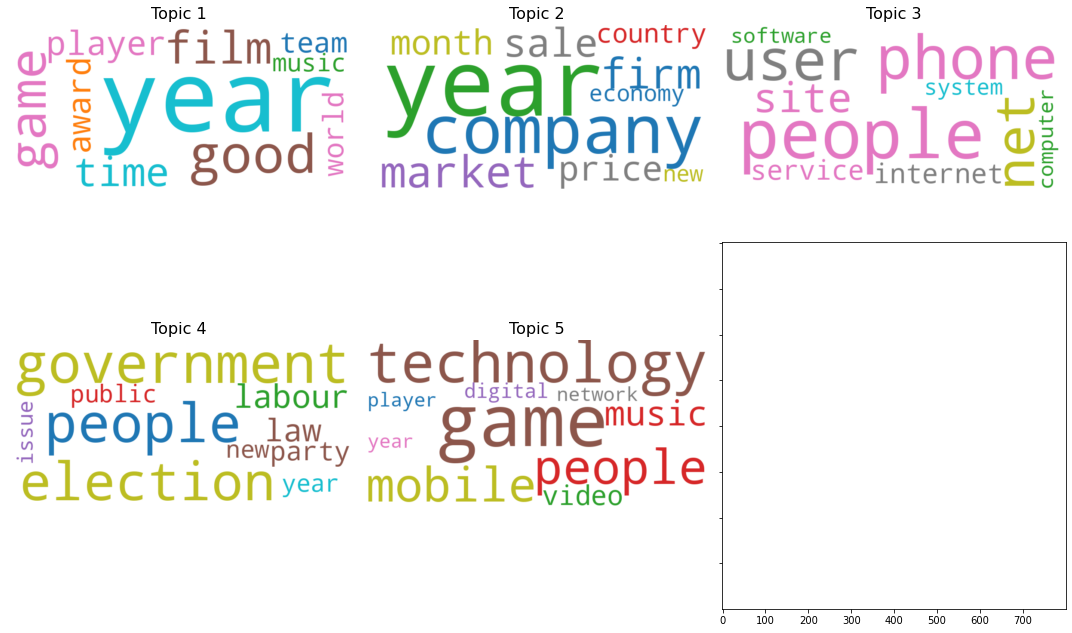

In [ ]:
import matplotlib
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

plot_wordclouds(lda_model, num_topics=5)

**Result:-**

- topic 1 tells us about = sports

- topic 2 tells us about = Business

- topic 3 tells us about = Entertainment 

- topic 4 tells us about = Politics

- topic 5 tells us about = Tech

# **Conclusion**

-  In this project, we performed topic modeling on the BBC news articles dataset using three different techniques: LDA, LSA and Gensim's implementation of the LDA. After comparing the results, we found that Gensim LDA produced the best performance in terms of coherence score and interpretability of the generated topics. 
- The top five topics generated by Gensim LDA were sports, business, entertainment, politics and technology. We identified the most significant keywords associated with each topics, which can be used to understand the major themes of the news articles.

### **What are the major themes ?**

-  the major themes that emerge from the BBC news articles are sports, business, entertainment, politics and technology. These themes are quite broad, so it might be useful to further refine them based on specific sub-themes or topics that are frequently discussed within each category.
-  For example, within the sports category, we might identify sub-themes such as football, basketball, tennis and so on. Within the technology category, we might identify sub-themes such as artificial intelligence, cybersecurity, social media and so on.

### **How can stakeholders use this information ?**

- Stakeholders such as media companies, advertisers, and content creators could use this information to better understand the types of news articles that are popular with different audiences. 

- For example, media companies could use this information to tailor their content to specific audiences and improve engagement. Advertisers could use this information to better target their ads to specific audiences. Content creators could use this information to identify popular topics and develop content that is likely to be well-received.

- Stakeholders can use this information in various ways. For example, if a stakeholder is interested in investing in a particular industry or sector, they can use this information to understand the latest news and trends related to that industry. They can also use this information to keep track of their competitors and identify potential business opportunities.

- Moreover, stakeholders can use this information to understand the public perception and sentiment towards a particular topic or issue. For instance, if there is a political issue that is affecting a company's reputation, stakeholders can use this information to gauge public opinion and sentiment towards the issue.

### **What are the applications of this project in the industry ?**

News organizations can use this project to automatically categorize news articles into different topics and improve their content curation process. This can help them to provide personalized news feeds to their users and increase user engagement. and businesses can use this project to analyze news articles related to their industry and identify potential business opportunities and threats. It can also help them to monitor their competitors and stay updated with the latest trends and news in their industry.

▪ **Content optimization:** Media companies could use topic modeling to analyze their existing content and identify topics that are popular with their audience. They could then use this information to optimize their content and improve engagement.

▪ **Ad targeting:** Advertisers could use topic modeling to better understand the interests and preferences of their target audience. They could then use this information to develop targeted ads that are more likely to be effective.

▪ **Competitor analysis:** Media companies and advertisers could use topic modeling to analyze the content produced by their competitors. This could help them identify gaps in the market and develop content that is more competitive.

▪ **Trend analysis:** Topic modeling could be used to identify emerging trends and topics that are likely to become popular in the near future. This could help media companies and advertisers stay ahead of the curve and produce content that is relevant to their audience.